In [0]:
#Random Forest Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('drive/My Drive/processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:

# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

rf_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('rf', RandomForestRegressor(random_state=0, warm_start=True))
                     ], verbose=True)
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
# Using a grid search to test parameters
from sklearn.model_selection import GridSearchCV

searchObj = GridSearchCV(rf_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
print(searchObj.best_params_)  
print(searchObj.best_score_)
print(searchObj.cv_results_)

y_pred = searchObj.predict(X_test)

print(mean_squared_error(y_test, y_pred))


starting pipeline
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.0s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 

[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.7s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  57.2s
{'rf__bootstrap': True, 'rf__min_impurity_decrease': 0.0001, 'rf__n_estimators': 30}
-0.051883462787662114
{'mean_fit_time': array([ 37.41037881, 106.48005285, 176.66700032,  34.43511658,
        97.84750345, 160.38418941,  32.51820221,  92.90920942,
       155.58810871,  28.15670869,  80.77894983, 132.71200304,
        24.71310699,  68.82722774, 112.80238674,  63.21122918,
       178.44239843, 293.89306531,  57.1194845 , 163.39073746,
       281.35070131,  57.61378758, 167.59716959, 273.95390506,
        48.21097264, 140.39411359, 235.55724647,  41.07948866,
       119.13409047, 196.75952127]), 'std_fit_time': array([0.34073548, 0.55367524, 1.25640648, 0.32825324, 0.88548997,
       0.95288387, 0.36530926, 1.39886607, 1.55394641, 0.41947354,
       1.04162012, 1.34772929, 0.31539315, 0.94090691, 0.75545179,
       0.91861478, 1.89514745, 6.85197

In [3]:
print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test,10**y_pred))

[ 1300. 10900.  8200. ... 12800.  7500.  3500.]
[ 1265.43811211 12702.14321607 11480.64955407 ... 11424.76961623
  4190.00020888  4743.35182132]
68681187.02017733


In [0]:
##runtime crashed, copying result from above:

mean_scores = np.array([-0.05219063, -0.05188346, -0.05190154, -0.06390886, -0.0636155 ,
       -0.06358362, -0.07416507, -0.07410867, -0.07427663, -0.10353169,
       -0.10344443, -0.10357986, -0.12385109, -0.12393154, -0.12403534,
       -0.05520944, -0.05520944, -0.05520944, -0.06685344, -0.06685344,
       -0.06685344, -0.0772552 , -0.0772552 , -0.0772552 , -0.10481646,
       -0.10481646, -0.10481646, -0.124201  , -0.124201  , -0.124201  ]).reshape(2,5,3)

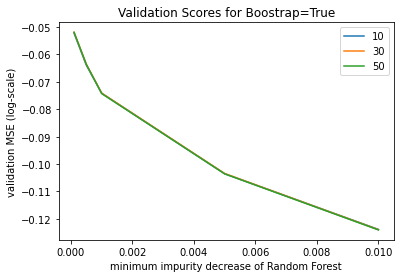

In [25]:
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
plt.plot(grid_param['rf__min_impurity_decrease'], mean_scores[0,:,0],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,1],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,2]
         )
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('minimum impurity decrease of Random Forest')
plt.title('Validation Scores for Boostrap=True')
plt.legend(grid_param['rf__n_estimators'])
plt.show()

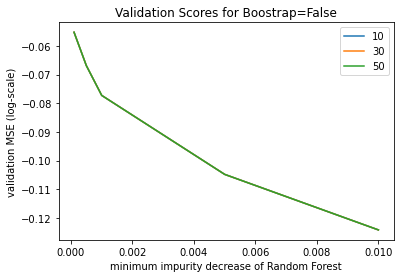

In [26]:
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
plt.plot(grid_param['rf__min_impurity_decrease'], mean_scores[1,:,0],
         grid_param['rf__min_impurity_decrease'], mean_scores[1,:,1],
         grid_param['rf__min_impurity_decrease'], mean_scores[1,:,2]
         )
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('minimum impurity decrease of Random Forest')
plt.title('Validation Scores for Boostrap=False')
plt.legend(grid_param['rf__n_estimators'])
plt.show()